# Plot PC loadings contributions

Script related to figure s5f

### Aim:
- Plot consensusTME NES PCA loadings contributions

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from pandas.api.types import CategoricalDtype

In [3]:
home = '~/git_repos/HGSOC_TME_Heterogeneity/'

## Get sample labels

### Load file

In [4]:
file_keys = home + 'Data/5/NACT_SampleLabels.txt'

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

In [5]:
sample_labels.head()

,Name,Case_mRNA,NACT,Site,Bounds
Well,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in
A02,A02_3368B_Liver,3368,Treated,other,out
A03,A03_0371A_R_diaphragm,371,Untreated,other,out
A04,A04_0371B_R_diaphragm,371,Treated,other,out
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in


## Load ssGSEA results

In [6]:
file_nes = home + 'Data/5/ConsensusTME_NACT_NES.txt'

data_nes = pd.read_csv(file_nes, sep='\t')

data_nes.set_index('Term', inplace=True)

In [7]:
data_nes.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
Term,,,,,,,,,,,,,,,,,,,,,
B_cells,0.254477,0.183183,0.328434,0.222920,0.158446,0.208608,0.153616,0.241499,0.227171,0.243108,...,0.282397,0.200239,0.268572,0.135625,0.237829,0.174235,0.346601,0.451349,0.345059,0.261922
Cytotoxic_cells,0.160124,0.086828,0.250783,0.469283,0.149997,0.280421,0.183015,0.136132,-0.013996,-0.005431,...,0.119812,0.128451,0.053743,-0.061381,0.264916,0.130406,0.056087,0.426493,0.242746,0.000835
Dendritic_cells,0.234120,0.242725,0.358290,0.249668,0.096655,0.219568,0.186520,0.244219,0.175394,0.125974,...,0.195455,0.213759,0.300447,0.175864,0.352042,0.078574,0.344772,0.479416,0.396381,0.237165
Endothelial,0.141871,-0.031062,0.359779,0.385954,-0.038934,0.295855,-0.023180,0.343295,0.143790,0.186743,...,0.214454,0.263538,0.230676,0.182908,0.467953,0.115959,0.192065,0.339805,0.233110,0.231086
Eosinophils,-0.104190,-0.001942,0.118276,0.292186,-0.136142,-0.127744,0.022336,0.303864,-0.069590,0.074915,...,-0.178187,-0.153298,0.104774,-0.223999,0.083588,-0.064987,0.086109,0.351228,0.080969,0.007399


### Check empty cells

In [8]:
set(data_nes.isnull().sum())

{0}

## Load mRNA tumour cellularity data

In [9]:
mRNA_tumcell_file = home + 'Data/5/NACT_log2exp_loess_norm_filtered_ESTIMATE.txt'

mRNA_tumcell = pd.read_csv(mRNA_tumcell_file,
                           skiprows=2,
                           sep='\t',
                           index_col='NAME')

del(mRNA_tumcell['Description'])

In [10]:
mRNA_tumcell.head().head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
NAME,,,,,,,,,,,,,,,,,,,,,
StromalScore,150.243978,100.962227,967.051900,808.453034,-65.569315,489.893858,490.720381,1061.377025,235.450362,418.150347,...,263.744096,464.939728,802.734452,153.081049,1103.804616,579.702569,788.616732,1237.456125,887.344608,501.153545
ImmuneScore,176.145317,526.978700,1297.193578,1203.727348,131.468582,650.323221,407.055460,1082.029608,88.028614,282.209677,...,481.526245,516.592649,582.005013,29.396052,908.321033,258.334588,849.462145,1496.053219,969.848566,621.394231
ESTIMATEScore,326.389295,627.940928,2264.245478,2012.180381,65.899267,1140.217080,897.775841,2143.406633,323.478976,700.360025,...,745.270341,981.532377,1384.739465,182.477100,2012.125649,838.037157,1638.078877,2733.509343,1857.193174,1122.547776
TumorPurity,0.794327,0.766668,0.591924,0.621334,0.816969,0.716267,0.740642,0.606127,0.794586,0.759799,...,0.755497,0.732326,0.690764,0.806982,0.621341,0.746506,0.663403,0.535046,0.638998,0.718075


### Add mRNA purity to NES dataframe

In [11]:
data_nes_t = data_nes.T 

#### Multiply purity times a small number to reduce it's impact in the PCA

In [12]:
data_nes_t['TumourCellularity_mRNA'] = mRNA_tumcell.loc['TumorPurity'] * 0.0001

In [13]:
data_nes = data_nes_t.T 

In [14]:
data_nes.tail()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
Term,,,,,,,,,,,,,,,,,,,,,
T_cells_CD4,-0.151260,-0.172278,0.154900,0.069036,-0.212100,-0.143919,-0.146261,-0.001396,-0.258183,-0.120923,...,-0.199379,-0.213471,-0.171529,-0.244783,-0.033248,-0.194803,-0.077282,0.163015,-0.007922,-0.093441
T_cells_CD8,-0.124588,-0.099327,0.098996,0.082092,-0.169720,-0.144463,-0.167269,-0.004968,-0.159959,-0.155491,...,-0.087820,-0.106419,-0.118318,-0.247615,0.025758,-0.182130,-0.034114,0.168739,0.004279,-0.072557
T_cells_gamma_delta,-0.121056,-0.110020,0.020995,0.065898,-0.180424,-0.120656,-0.143999,-0.051105,-0.231617,-0.171884,...,-0.089236,-0.112779,-0.147467,-0.258662,-0.023540,-0.152077,-0.047563,0.172180,-0.019459,-0.113018
T_regulatory_cells,-0.171317,-0.176621,0.124944,0.077918,-0.287924,-0.195206,-0.345462,0.040120,-0.353342,-0.133729,...,-0.229964,-0.182788,-0.230199,-0.264175,-0.043436,-0.208631,-0.065168,0.105513,-0.091520,-0.187371
TumourCellularity_mRNA,0.000079,0.000077,0.000059,0.000062,0.000082,0.000072,0.000074,0.000061,0.000079,0.000076,...,0.000076,0.000073,0.000069,0.000081,0.000062,0.000075,0.000066,0.000054,0.000064,0.000072


### Visulase NES

#### Samples

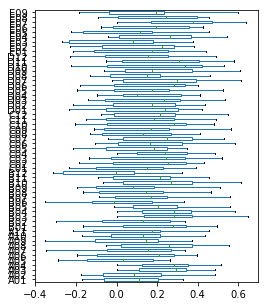

In [15]:
data_nes.plot(kind='box',
              vert=False,
              figsize=(4,5))

#### Variables

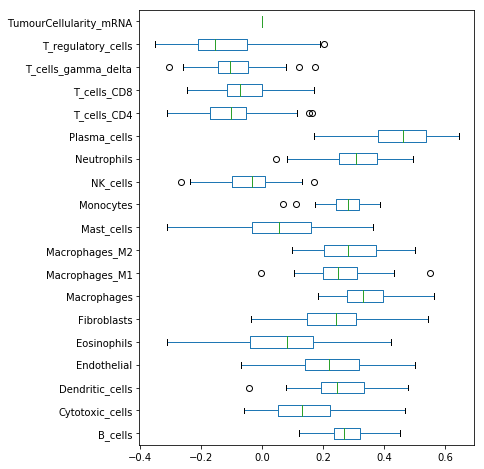

In [16]:
data_nes.transpose().plot(kind='box',
                          vert=False,
                          figsize=(6,8))

## Plot features PCs contributions

### Define gene set colors

In [17]:
GREEN = '#007F00'
RED = '#CC0000'
GREY = '#D3D3D3'
BLUE = '#0000E5'
YELLOW = '#FFFF00'

color_sets = {
'Endothelial':                                  RED,
'B_cells':                                      '#A6CDE1',
'T_cells_CD8':                                  '#FFDD15',
'Cytotoxic_cells':                              '#FFD400',
'Dendritic_cells':                              '#A181BA',
'Eosinophils':                                  '#D8AF62',
'Macrophages':                                  '#F58A21',
'Macrophages_M1':                               '#F58A21',
'Macrophages_M2':                               '#F58A21',
'Monocytes':                                    '#F58A21',
'Mast_cells':                                   '#F7F29B',
'NK_cells':                                     '#70B09D',
'Neutrophils':                                  '#B05A28',
'T_cells_gamma_delta':                          '#4F9F45',
'T_cells_CD4':                                  '#EC1C24',
'T_regulatory_cells':                           '#67B853',
'Plasma_cells':                                 '#A6CDE1',
'Fibroblasts':                                  BLUE,
'TumourCellularity_mRNA':                       'k'
}

### Separate matched and unmatched samples

In [18]:
matched = [3368,371,9717,8674,2359,564,7765,6965,9347]

matched_df = sample_labels[sample_labels['Case_mRNA'].isin(matched)]

unmatched_df = sample_labels[~sample_labels['Case_mRNA'].isin(matched)]

In [19]:
matched_nes_df = data_nes[matched_df.index]

unmatched_nes_df = data_nes[unmatched_df.index]

## Calculate matched PCA

In [20]:
pca = PCA(n_components=7)

In [21]:
pca_nes = pca.fit_transform(matched_nes_df.transpose())

In [22]:
len(pca_nes) # check number of data points

18

In [23]:
var_exp = sorted(pca.explained_variance_ratio_, reverse=True)

### Dump components relations with features

In [24]:
components = pd.DataFrame(pca.components_,
                          columns=data_nes.transpose().columns)

In [25]:
components.head()

Term,B_cells,Cytotoxic_cells,Dendritic_cells,Endothelial,Eosinophils,Fibroblasts,Macrophages,Macrophages_M1,Macrophages_M2,Mast_cells,Monocytes,NK_cells,Neutrophils,Plasma_cells,T_cells_CD4,T_cells_CD8,T_cells_gamma_delta,T_regulatory_cells,TumourCellularity_mRNA
0,-0.084228,-0.255495,-0.180445,-0.282445,-0.359617,-0.241726,-0.087554,-0.125374,-0.165521,-0.207615,-0.118420,-0.203378,-0.166779,-0.259252,-0.284667,-0.261884,-0.224976,-0.427793,1.857220e-05
1,-0.051382,-0.083655,-0.203880,0.085211,0.176519,0.499835,-0.059225,-0.119635,-0.018111,0.659091,-0.010633,-0.074621,0.167737,-0.115087,-0.103009,-0.164207,-0.131643,-0.325613,4.750641e-07
2,-0.122441,-0.563404,-0.124975,-0.422795,0.433052,-0.061771,-0.072318,-0.051873,-0.201109,-0.047508,-0.026250,-0.141304,0.270228,0.144967,0.114519,0.018734,-0.054464,0.316403,6.960320e-07
3,0.218505,-0.565180,0.078905,0.557417,-0.121301,0.178408,0.096374,0.304642,-0.017687,-0.116842,-0.018053,-0.304493,-0.161242,0.159164,-0.020018,0.014726,-0.089560,0.016485,-1.045509e-05
4,-0.031538,-0.099753,0.029384,0.048663,0.090948,-0.521258,0.327957,0.330862,0.266876,0.345944,0.140268,-0.107638,0.111749,-0.470273,0.145957,-0.089919,-0.045298,0.039625,-1.100437e-05


### PCs barplots

In [26]:
feature_names = pd.Series(components.columns.values,name='features')

In [27]:
PCs = pca.components_

pc_df = pd.DataFrame(PCs).T
pc_df = pd.concat([feature_names,pc_df],axis=1)

pc_df.set_index('features',inplace=True)

In [28]:
fcolors = []
for f in pc_df.index:
    fcolors.append(color_sets[f])

In [29]:
fcolors_df = pd.DataFrame({'index':pc_df.index,
                           'color':pd.Series(fcolors)})

fcolors_df.set_index('index',inplace=True)

In [30]:
pc_df = pd.concat([pc_df,fcolors_df],axis=1)

In [31]:
feature_names = pd.Series(components.columns.values,name='features')

In [32]:
PCs = pca.components_

pc_df = pd.DataFrame(PCs).T
pc_df = pd.concat([feature_names,pc_df],axis=1)

pc_df.set_index('features',inplace=True)

In [33]:
fcolors = []
for f in pc_df.index:
    fcolors.append(color_sets[f])

In [34]:
fcolors_df = pd.DataFrame({'index':pc_df.index,
                           'color':pd.Series(fcolors)})

fcolors_df.set_index('index',inplace=True)

In [35]:
pc_df = pd.concat([pc_df,fcolors_df],axis=1)

In [36]:
pc_df.tail()

,0,1,2,3,4,5,6,color
T_cells_CD4,-0.284667,-1.030085e-01,1.145192e-01,-0.020018,0.145957,0.146626,0.062133,#EC1C24
T_cells_CD8,-0.261884,-1.642075e-01,1.873379e-02,0.014726,-0.089919,-0.123514,-0.101114,#FFDD15
T_cells_gamma_delta,-0.224976,-1.316434e-01,-5.446417e-02,-0.089560,-0.045298,-0.193988,-0.005502,#4F9F45
T_regulatory_cells,-0.427793,-3.256130e-01,3.164031e-01,0.016485,0.039625,0.295228,0.014731,#67B853
TumourCellularity_mRNA,0.000019,4.750641e-07,6.960320e-07,-0.000010,-0.000011,0.000014,-0.000010,k


### Remove TumourCellularity_mRNA feature to sort the other features

In [37]:
TumCell = pc_df.loc['TumourCellularity_mRNA']
TumCell

0        1.85722e-05
1        4.75064e-07
2        6.96032e-07
3       -1.04551e-05
4       -1.10044e-05
5        1.41716e-05
6       -1.04731e-05
color              k
Name: TumourCellularity_mRNA, dtype: object

In [38]:
pc_df.drop('TumourCellularity_mRNA',
           axis=0,
           inplace=True)

### Sort features within PCs

In [39]:
pc_df0 = pc_df.sort_values(by=[0],
                           inplace=False)  

pc_df0['feature'] = pc_df0.index

pc_df1 = pc_df.sort_values(by=[1],
                           inplace=False)

pc_df1['feature'] = pc_df1.index

pc_df2 = pc_df.sort_values(by=[2],
                           inplace=False)

pc_df2['feature'] = pc_df2.index

pc_df3 = pc_df.sort_values(by=[3],
                           inplace=False)  

pc_df3['feature'] = pc_df3.index

pc_df4 = pc_df.sort_values(by=[4],
                           inplace=False)  

pc_df4['feature'] = pc_df4.index

pc_df5 = pc_df.sort_values(by=[5],
                           inplace=False)  

pc_df5['feature'] = pc_df5.index

pc_df6 = pc_df.sort_values(by=[6],
                           inplace=False) 

pc_df6['feature'] = pc_df6.index

### Plot

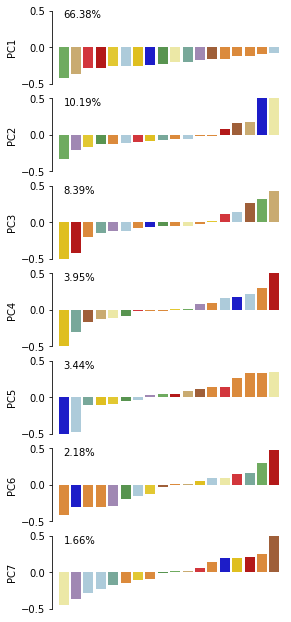

In [41]:
y_anotate=0.4

fig,(ax0,ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=7,
                                                 ncols=1,
                                                 figsize=(4, 11),
                                                 sharex=True,
                                                 sharey=True)                                               

sns.barplot(x='feature',
            y=0,
            data=pc_df0,
            palette=pc_df0.color,
            ax=ax0)

ax0.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[0]*100,2))+'%')
ax0.set_ylabel("PC1")
ax0.set_xlabel('')
ax0.set_ylim([-0.5,0.5])
sns.despine(bottom=True,trim=True,offset=5)


sns.barplot(x='feature',
            y=1,
            data=pc_df1,
            palette=pc_df1.color,
            ax=ax1)

ax1.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[1]*100,2))+'%')
ax1.set_ylabel("PC2")
ax1.set_xlabel('')


sns.barplot(x='feature',
            y=2,
            data=pc_df2,
            palette=pc_df2.color,
            ax=ax2)

ax2.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[2]*100,2))+'%')
ax2.set_ylabel("PC3")
ax2.set_xlabel('')


sns.barplot(x='feature',
            y=3,
            data=pc_df3,
            palette=pc_df3.color,
            ax=ax3)

ax3.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[3]*100,2))+'%')
ax3.set_ylabel("PC4")
ax3.set_xlabel('')


sns.barplot(x='feature',
            y=4,
            data=pc_df4,
            palette=pc_df4.color,
            ax=ax4)

ax4.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[4]*100,2))+'%')
ax4.set_ylabel("PC5")
ax4.set_xlabel('')


sns.barplot(x='feature',
            y=5,
            data=pc_df5,
            palette=pc_df5.color,
            ax=ax5)

ax5.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[5]*100,2))+'%')
ax5.set_ylabel("PC6")
ax5.set_xlabel('')

sns.barplot(x='feature',
            y=6,
            data=pc_df6,
            palette=pc_df6.color,
            ax=ax6)

ax6.text(x=0,y=y_anotate,
         s=str(round(var_exp[6]*100,2))+'%')
ax6.set_ylabel("PC7")
ax6.set_xlabel('')

# Finalize the plot
sns.despine(bottom=True,trim=True,offset=5)
plt.setp(fig.axes,xticks=[])

plt.show()

### Save plot

In [42]:
file_name = '../../Figures/supplementary/5/s5f_NACT_matched_ConsensusTME_PCs_loadings.pdf'

fig.savefig(file_name, bbox='tight')

## Calculate unmatched PCA

In [43]:
pca = PCA(n_components=7)

In [44]:
pca_nes = pca.fit_transform(unmatched_nes_df.transpose())

In [45]:
len(pca_nes) # check number of data points

38

In [46]:
var_exp = sorted(pca.explained_variance_ratio_, reverse=True)

### Dump components relations with features

In [47]:
components = pd.DataFrame(pca.components_,
                          columns=data_nes.transpose().columns)

In [48]:
components.head()

Term,B_cells,Cytotoxic_cells,Dendritic_cells,Endothelial,Eosinophils,Fibroblasts,Macrophages,Macrophages_M1,Macrophages_M2,Mast_cells,Monocytes,NK_cells,Neutrophils,Plasma_cells,T_cells_CD4,T_cells_CD8,T_cells_gamma_delta,T_regulatory_cells,TumourCellularity_mRNA
0,-0.174022,-0.191707,-0.277239,-0.182269,-0.400219,-0.051731,-0.209280,-0.255759,-0.243085,-0.373800,-0.181540,-0.177580,-0.222618,-0.154048,-0.240096,-0.238362,-0.210875,-0.235140,1.615286e-05
1,-0.077584,0.098336,0.042978,0.558915,-0.108677,0.733638,0.006136,-0.072382,0.059002,-0.303788,0.024835,-0.020232,-0.039229,-0.097486,0.045788,0.056730,0.032246,-0.023962,-1.416001e-05
2,-0.036830,-0.523953,0.240183,0.274799,0.267936,-0.120833,0.257502,0.162553,0.246569,-0.056378,0.045295,-0.398542,-0.017924,0.089230,-0.216001,-0.152712,-0.227282,-0.238775,-5.494811e-07
3,0.048376,-0.070561,0.084537,0.500318,-0.511137,-0.542407,0.065468,0.083943,0.086534,-0.120349,0.050710,0.114257,-0.108443,-0.178047,0.110303,0.134117,0.154273,0.182768,-1.900283e-06
4,0.081241,0.204114,0.120763,-0.216726,-0.302869,0.102761,0.169071,0.294561,0.295383,0.122125,0.146507,0.136897,0.227738,-0.496395,-0.169676,-0.119857,-0.068653,-0.428989,-7.441729e-06


### PCs barplots

In [49]:
feature_names = pd.Series(components.columns.values,name='features')

In [50]:
PCs = pca.components_

pc_df = pd.DataFrame(PCs).T
pc_df = pd.concat([feature_names,pc_df],axis=1)

pc_df.set_index('features',inplace=True)

In [51]:
fcolors = []
for f in pc_df.index:
    fcolors.append(color_sets[f])

In [52]:
fcolors_df = pd.DataFrame({'index':pc_df.index,
                           'color':pd.Series(fcolors)})

fcolors_df.set_index('index',inplace=True)

In [53]:
pc_df = pd.concat([pc_df,fcolors_df],axis=1)

In [54]:
feature_names = pd.Series(components.columns.values,name='features')

In [55]:
PCs = pca.components_

pc_df = pd.DataFrame(PCs).T
pc_df = pd.concat([feature_names,pc_df],axis=1)

pc_df.set_index('features',inplace=True)

In [56]:
fcolors = []
for f in pc_df.index:
    fcolors.append(color_sets[f])

In [57]:
fcolors_df = pd.DataFrame({'index':pc_df.index,
                           'color':pd.Series(fcolors)})

fcolors_df.set_index('index',inplace=True)

In [58]:
pc_df = pd.concat([pc_df,fcolors_df],axis=1)

In [59]:
pc_df.tail()

,0,1,2,3,4,5,6,color
T_cells_CD4,-0.240096,0.045788,-2.160014e-01,0.110303,-0.169676,-0.095542,0.004885,#EC1C24
T_cells_CD8,-0.238362,0.056730,-1.527116e-01,0.134117,-0.119857,0.010723,-0.057282,#FFDD15
T_cells_gamma_delta,-0.210875,0.032246,-2.272819e-01,0.154273,-0.068653,-0.046786,-0.069353,#4F9F45
T_regulatory_cells,-0.235140,-0.023962,-2.387751e-01,0.182768,-0.428989,0.116343,0.093858,#67B853
TumourCellularity_mRNA,0.000016,-0.000014,-5.494811e-07,-0.000002,-0.000007,0.000005,-0.000006,k


### Remove TumourCellularity_mRNA feature to sort the other features

In [60]:
TumCell = pc_df.loc['TumourCellularity_mRNA']
TumCell

0        1.61529e-05
1         -1.416e-05
2       -5.49481e-07
3       -1.90028e-06
4       -7.44173e-06
5        4.52809e-06
6       -6.14123e-06
color              k
Name: TumourCellularity_mRNA, dtype: object

In [61]:
pc_df.drop('TumourCellularity_mRNA',
           axis=0,
           inplace=True)

### Sort features within PCs

In [62]:
pc_df0 = pc_df.sort_values(by=[0],
                           inplace=False)  

pc_df0['feature'] = pc_df0.index

pc_df1 = pc_df.sort_values(by=[1],
                           inplace=False)

pc_df1['feature'] = pc_df1.index

pc_df2 = pc_df.sort_values(by=[2],
                           inplace=False)

pc_df2['feature'] = pc_df2.index

pc_df3 = pc_df.sort_values(by=[3],
                           inplace=False)  

pc_df3['feature'] = pc_df3.index

pc_df4 = pc_df.sort_values(by=[4],
                           inplace=False)  

pc_df4['feature'] = pc_df4.index

pc_df5 = pc_df.sort_values(by=[5],
                           inplace=False)  

pc_df5['feature'] = pc_df5.index

pc_df6 = pc_df.sort_values(by=[6],
                           inplace=False) 

pc_df6['feature'] = pc_df6.index

### Plot

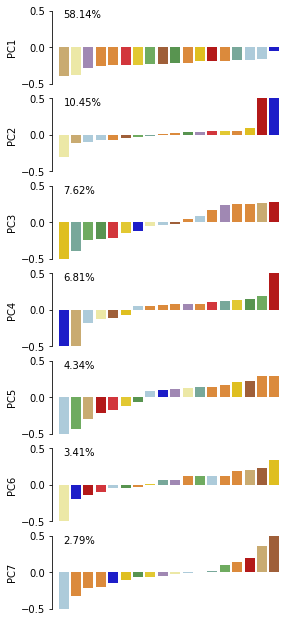

In [64]:
y_anotate=0.4

fig,(ax0,ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=7,
                                                 ncols=1,
                                                 figsize=(4, 11),
                                                 sharex=True,
                                                 sharey=True)                                               

sns.barplot(x='feature',
            y=0,
            data=pc_df0,
            palette=pc_df0.color,
            ax=ax0)

ax0.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[0]*100,2))+'%')
ax0.set_ylabel("PC1")
ax0.set_xlabel('')
ax0.set_ylim([-0.5,0.5])
sns.despine(bottom=True,trim=True,offset=5)


sns.barplot(x='feature',
            y=1,
            data=pc_df1,
            palette=pc_df1.color,
            ax=ax1)

ax1.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[1]*100,2))+'%')
ax1.set_ylabel("PC2")
ax1.set_xlabel('')


sns.barplot(x='feature',
            y=2,
            data=pc_df2,
            palette=pc_df2.color,
            ax=ax2)

ax2.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[2]*100,2))+'%')
ax2.set_ylabel("PC3")
ax2.set_xlabel('')


sns.barplot(x='feature',
            y=3,
            data=pc_df3,
            palette=pc_df3.color,
            ax=ax3)

ax3.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[3]*100,2))+'%')
ax3.set_ylabel("PC4")
ax3.set_xlabel('')


sns.barplot(x='feature',
            y=4,
            data=pc_df4,
            palette=pc_df4.color,
            ax=ax4)

ax4.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[4]*100,2))+'%')
ax4.set_ylabel("PC5")
ax4.set_xlabel('')


sns.barplot(x='feature',
            y=5,
            data=pc_df5,
            palette=pc_df5.color,
            ax=ax5)

ax5.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[5]*100,2))+'%')
ax5.set_ylabel("PC6")
ax5.set_xlabel('')

sns.barplot(x='feature',
            y=6,
            data=pc_df6,
            palette=pc_df6.color,
            ax=ax6)

ax6.text(x=0,y=y_anotate,
         s=str(round(var_exp[6]*100,2))+'%')
ax6.set_ylabel("PC7")
ax6.set_xlabel('')

# Finalize the plot
sns.despine(bottom=True,trim=True,offset=5)
plt.setp(fig.axes,xticks=[])

plt.show()

### Save plot

In [65]:
file_name = '../../Figures/supplementary/5/s5f_NACT_unmatched_consensusTME_PCs_loadings.pdf'

fig.savefig(file_name, bbox='tight')

# End script